<a href="https://colab.research.google.com/github/ranaelayeb/embracenet/blob/master/Copie_de_Copie_de_embracnet_meld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

In [ ]:
!pip install -U featuretools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 4.9 MB/s 
     |████████████████████████████████| 207 kB 52.0 MB/s 
     |████████████████████████████████| 281 kB 50.0 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [ ]:
!pip install q keras==2.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires keras<2.9,>=2.8.0rc0, but you have keras 2.4.3 which is incompatible.


In [ ]:
!pip install tensorflow==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.3 MB 12 kB/s 
     |████████████████████████████████| 2.9 MB 32.5 MB/s 
     |████████████████████████████████| 14.8 MB 65.7 MB/s 
     |████████████████████████████████| 462 kB 42.0 MB/s 
     |████████████████████████████████| 132 kB 57.2 MB/s 
     |████████████████████████████████| 3.8 MB 36.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=b84f539ac3fbe6dd47bfef51948b5006a5defa6b72629833d3c33bbf871e63ff
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: n

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
nRowsRead = 20 
df1 = pd.read_csv('/content/drive/MyDrive/embracenetmel/meld-embracenet-main/dev_sent_emo.csv', delimiter=',', nrows = nRowsRead)

In [ ]:
nRowsRead = 20 
df2 = pd.read_csv('/content/drive/MyDrive/embracenetmel/meld-embracenet-main/train_sent_emo.csv', delimiter=',', nrows = nRowsRead)

In [ ]:
df1.head(20)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, he’s lost it. He’s totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,You’re a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we won’t be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"
5,6,"Now, there’s two reasons.",Chandler,neutral,neutral,1,3,4,4,"00:12:38,466","00:12:39,841"
6,7,Hey.,Phoebe,neutral,neutral,1,4,4,4,"0:12:43,012","0:12:44,074"
7,8,Hey!,All,joy,positive,1,5,4,4,"0:12:44,074","0:12:45,189"
8,9,"Ohh, you guys, remember that cute client I tol...",Phoebe,neutral,neutral,1,6,4,4,"00:12:45,347","00:12:50,852"
9,10,Where?!,Rachel,surprise,negative,1,7,4,4,"0:12:52,730","0:12:55,002"


In [ ]:
df2.head(20)

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
5,6,"Now you’ll be heading a whole division, so you...",The Interviewer,neutral,neutral,0,5,8,21,"00:16:41,126","00:16:44,337"
6,7,I see.,Chandler,neutral,neutral,0,6,8,21,"00:16:48,800","00:16:51,886"
7,8,But there’ll be perhaps 30 people under you so...,The Interviewer,neutral,neutral,0,7,8,21,"00:16:48,800","00:16:54,514"
8,9,Good to know.,Chandler,neutral,neutral,0,8,8,21,"00:16:59,477","00:17:00,478"
9,10,We can go into detail,The Interviewer,neutral,neutral,0,9,8,21,"00:17:00,478","00:17:02,719"


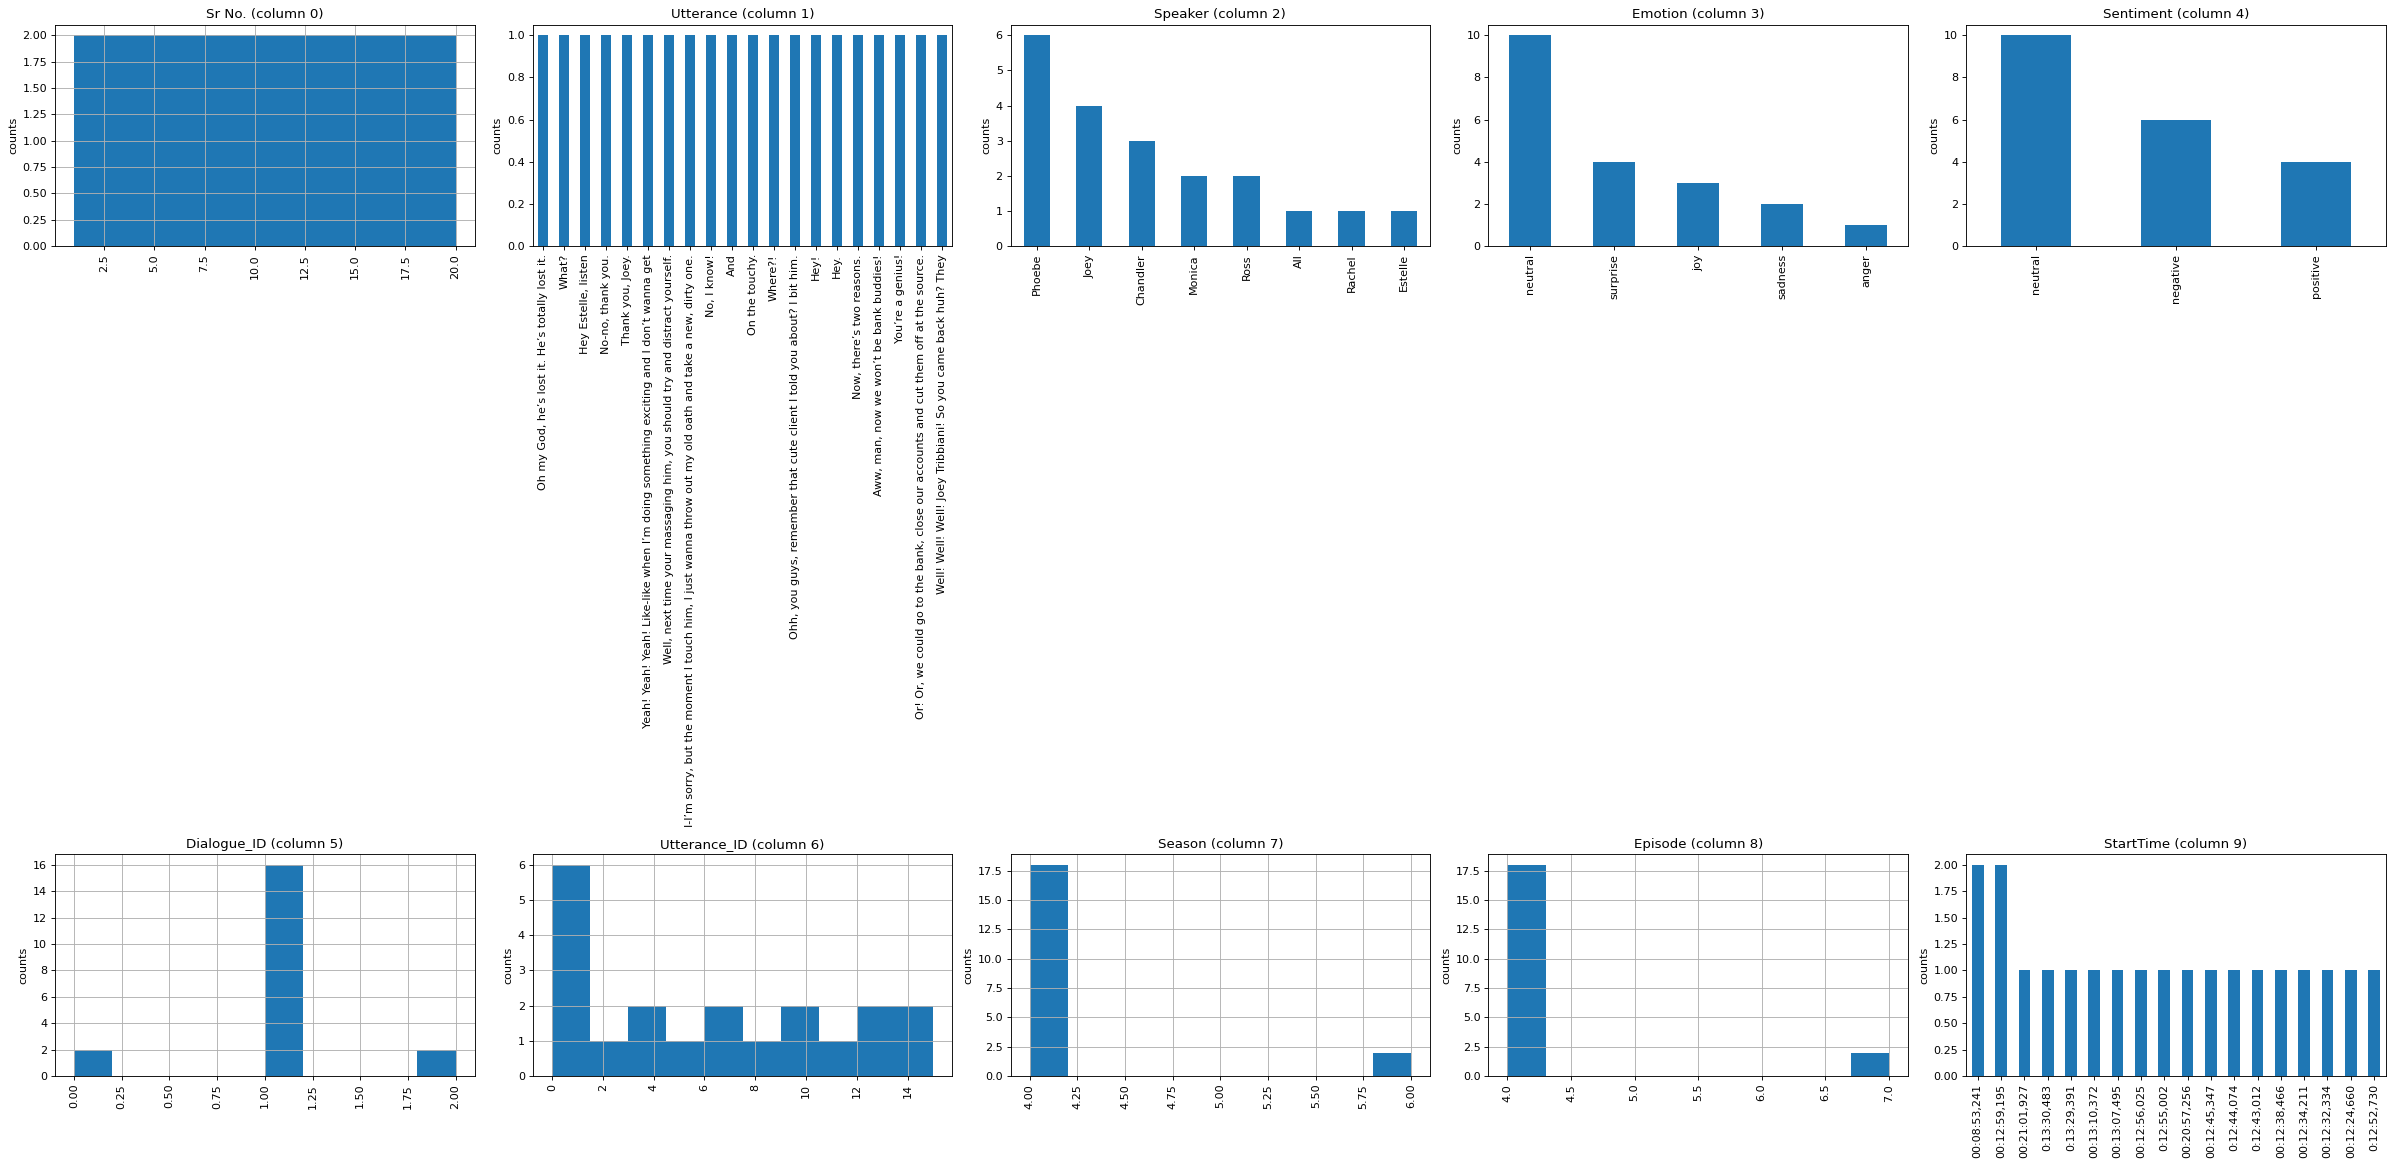

In [ ]:
plotPerColumnDistribution(df1, 10, 5)

In [ ]:
!git clone https://github.com/ranaelayeb/ranaelayeb.git

Cloning into 'ranaelayeb'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (34/34), done.


In [ ]:
import os

In [ ]:
os.listdir()

['.config', 'ranaelayeb', 'drive', 'sample_data']

In [ ]:
os.listdir("/content/drive")

['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash-0']

In [ ]:
os.listdir("/content/drive/MyDrive")

['Untitled0.ipynb',
 'Colab Notebooks',
 'yolo_custom (1)',
 'Compte-rendu-Rana-ELAYEB-EI-3-3-TP-Dimensionnement.rtf',
 'Untitled1.ipynb',
 'yolo_custom',
 'Untitled2.ipynb',
 'Untitled3.ipynb',
 '1 ere -converted.pdf',
 "2-traitement_numerique_de_l'image.pdf",
 'yolov3masque',
 'model-rana.weights',
 'Rapportprojetsemestriel (2).odt',
 'vac.jpg',
 'pdf_CEM_BHS2020.rar',
 'Automated Machine Learning with AutoKeras Deep learning made accessible for everyone with just few lines of coding by Luis Sobrecueva (z-lib.org) (1).pdf',
 'RANA',
 'Untitled4.ipynb',
 'code embracenet .ipynb',
 'Untitled',
 'embracenetmel',
 'embracenetavecmeld',
 'audio_emotion.pkl',
 'audio_embeddings_feature_selection_sentiment.pkl',
 'audio_sentiment.pkl',
 'audio_embeddings_feature_selection_emotion.pkl',
 'data_emotion.p',
 'data_sentiment.p',
 'text_glove_average_emotion.pkl',
 'text_glove_average_sentiment.pkl',
 'text_glove_CNN_emotion.pkl',
 'text_glove_CNN_sentiment.pkl',
 'bimodal_sentiment.pkl',
 'text

In [ ]:
os.listdir("/content/drive/MyDrive/embracenetavecmeld")

['data',
 '__pycache__',
 'app.py',
 'Untitled0.ipynb',
 'embracenet.py',
 'train-test.py',
 'extraction.py']

In [ ]:
os.listdir("/content/drive/MyDrive/embracenetavecmeld/data/pickles/features")

['audio_embeddings_feature_selection_emotion.pkl',
 'audio_embeddings_feature_selection_sentiment.pkl',
 'audio_emotion.pkl',
 'audio_sentiment.pkl',
 'bimodal_sentiment.pkl',
 'data_emotion.p',
 'data_sentiment.p',
 'text_emotion.pkl',
 'text_glove_CNN_emotion.pkl',
 'text_glove_CNN_sentiment.pkl',
 'text_glove_average_emotion.pkl',
 'text_glove_average_sentiment.pkl',
 'text_sentiment.pkl']

In [ ]:
!pip install data-helper-2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for data-helper-2: filename=data_helper_2-0.31-py3-none-any.whl size=8087 sha256=1816cbd18d762341176a2183bc0549578cf4956dce41f24d2cd157694ef2a28e
  Stored in directory: /root/.cache/pip/wheels/4a/6e/b1/22dd7e5ecabd449221a7e53839b134e20984fade0401ea0da0
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e02c89bce3ae23a346b45060698bf50b4e20a31b2615e86afb21fd3bc3e0c936
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built data-helper-2 sklearn


In [ ]:
!python /content/drive/MyDrive/embracenetavecmeld/train-test.py  -classify Emotion -modality bimodal -train 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
        3.15712303e-01,  2.03512177e-01, -7.67847449e-02, -1.10711735e-02,
        5.14760092e-02,  2.02659935e-01, -3.05836409e-01,  2.07383856e-02,
       -1.41154742e-02,  3.56114417e-01,  2.72816140e-02, -2.68106341e-01,
       -1.95878580e-01,  1.10927403e-01,  4.48189676e-01,  1.09261528e-01,
       -3.57132614e-01, -3.93138349e-01, -3.76271337e-01, -1.67182520e-01,
       -1.07851014e-01,  3.48845869e-01, -1.85193509e-01, -1.58217743e-01,
        3.89959514e-02, -4.26441759e-01,  2.65201360e-01, -2.70057499e-01,
        1.91324100e-01, -3.07030231e-01, -1.72591016e-01, -2.38056377e-01,
       -9.96499322e-03, -1.27855495e-01, -2.05689341e-01,  2.53236890e-02,
        4.38447297e-02,  3.11573923e-01,  3.27894539e-01,  2.43715290e-02,
        3.84717062e-02, -4.04296458e-01,  3.05899382e-01, -2.22416371e-01,
        4.95182797e-02,  7.26982206e-02, -2.08691552e-01,  1.62071019e-01,
       -4.67074990e-01

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
! ls

data  drive  ranaelayeb  sample_data


In [ ]:
from google.colab import files

uploaded = files.upload()